# SVM (Support Vector Machines)

In [60]:
import pandas as pd 
import pylab as pl 
import numpy as np 
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt


# Load the Cancer data

In [61]:
celldf = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
celldf.head(5)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


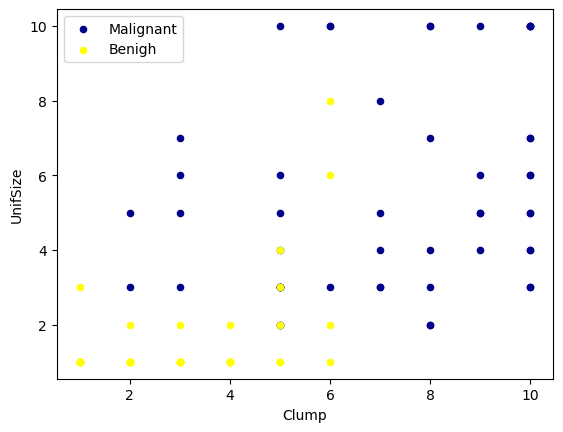

In [62]:
axs = celldf[celldf['Class'] == 4][0:50].plot(kind = 'scatter' , x = 'Clump', y = 'UnifSize' , color = 'DarkBlue',label = 'Malignant'); # label='malignant': Adds a label for the legend.
# malignant" - "ദുഷ്ടസ്വഭാവമുള്ള

celldf[celldf['Class'] == 2][0:50].plot(kind = 'scatter' , x = 'Clump' , y = 'UnifSize' , color = 'Yellow' , label = 'Benigh',ax = axs ); #ax=axs  axes object (axs) where the scatter plot should be drawn.
# benign"  "നല്ല സ്വഭാവമുള്ള"

## Data pre-processing and selection


In [63]:
celldf.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:

.notnull():

Checks which rows in the resulting series are not NaN (i.e., valid numeric values).

this is commonly used in data cleaning to:

Remove invalid or non-numeric values from a dataset.
Prepare the data for further numerical analysis or machine learning models.

errors='coerce':

Converts invalid entries to NaN.
Without errors='coerce', invalid entries would raise an error.



In [64]:
celldf = celldf[pd.to_numeric(celldf['BareNuc'],errors='coerce').notnull()]

celldf['BareNuc'] = celldf['BareNuc'].astype('int')

celldf.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [65]:
fdf = celldf[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

x = np.asanyarray(fdf)

x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [66]:
y = np.asarray(celldf['Class'])
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

### Train/Test dataset

In [67]:
xtrain , xtest , ytrain, ytest = train_test_split(x , y , test_size = 0.2 , random_state = 4)

print("train set : " , xtrain.shape , ytrain.shape)
print("Test set : " , xtest.shape , ytest.shape)

train set :  (546, 9) (546,)
Test set :  (137, 9) (137,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.


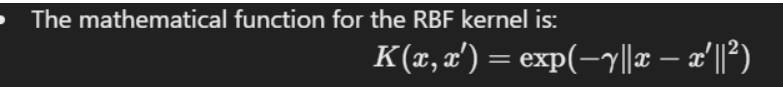

svm
What it is: Refers to the Support Vector Machine module provided by the sklearn (scikit-learn) library.

SVC
What it is: Stands for Support Vector Classifier, a specific implementation of SVM designed for classification tasks.

kernel='rbf'
What it is: Specifies the Radial Basis Function (RBF) kernel.

In [68]:
from sklearn import svm
cf = svm.SVC(kernel='rbf')
cf.fit(xtrain,ytrain)


SVC()

In [69]:
ypre = cf.predict(xtest)
ypre[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

<h2 id="evaluation">Evaluation</h2>


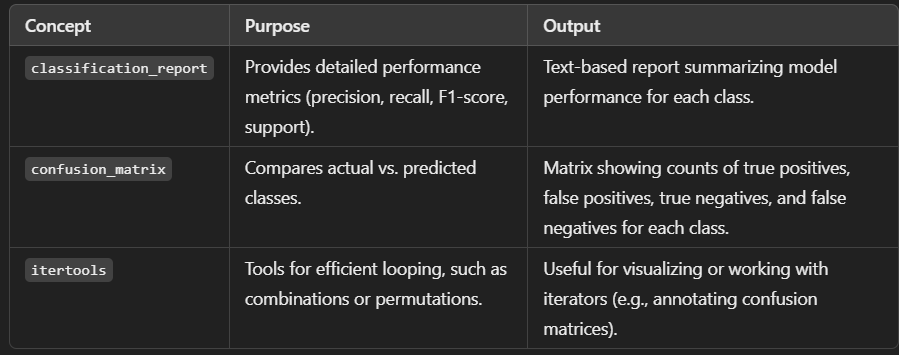


In [70]:
from sklearn.metrics import classification_report , confusion_matrix
import itertools
import matplotlib.pyplot as plt 

### cm:
The confusion matrix (a 2D NumPy array or similar structure) to be visualized.
Rows represent actual classes, columns represent predicted classes.
### classes:
A list of class names or labels corresponding to the rows and columns of the confusion matrix.
Example: ['Class 0', 'Class 1'].
### normalize:
A boolean flag indicating whether to normalize the confusion matrix values.
Normalization scales the values to proportions (0 to 1) instead of raw counts.
### title:
The title of the plot.
### cmap:
A colormap for the plot (default is plt.cm.Blues).

### If normalize=True:
#### cm.astype('float'): Converts the confusion matrix to float type to allow division.
#### cm.sum(axis=1):
Sums the values along each row (corresponding to each actual class).
Produces a 1D array where each element is the total number of actual samples for a class.
#### [:, np.newaxis]:
Reshapes the sum array into a column vector for broadcasting (division along rows).
#### cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]:
Divides each cell in the confusion matrix by the total for its row, resulting in a normalized confusion matrix where each row sums to 1.

In [71]:
def plot_confusionmetrix (cm, classes, normalize = False,title = 'Confusion metrix' , cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print('Noermalized confusion metrix')
    else:
        print("Confusion metrix without normalization")
        
    print(cm)

    plt.imshow(cm , interpolation='nearest', cmap=cmap) #interpolation='nearest' prevents smoothing between pixels.exact pixel values matter without any approximation , cmap = colormap
    plt.title(title)
    plt.colorbar() #ds a color bar to the side of the plot, 
    tick_marks = np.arange(len(classes))#length of this array is determined by the number of classes in your confusion matrix (len(classes)),  rows and columns in cm.
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)


    fmt = '.2f' if normalize else 'd' #'.2f': This format string means that the number will be displayed with 2 decimal places, d - intiger
    thresh = cm.max() / 2 #maximum value from the confusion matrix (cm).divide 2


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion metrix without normalization
[[85  5]
 [ 0 47]]


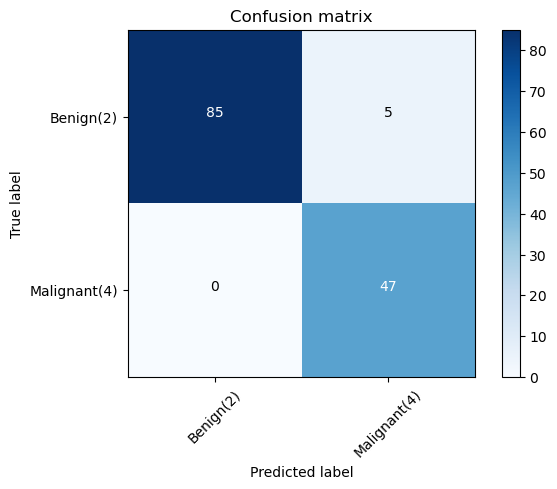

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, ypre, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(ytest, ypre))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusionmetrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [73]:
from sklearn.metrics import f1_score
f1_score(ytest, ypre, average='weighted') 

0.9639038982104676

In [74]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest, ypre,pos_label=2)

0.9444444444444444

<h2 id="practice">Practice</h2>
Can you rebuild the model, but this time with a __linear__ kernel? You can use __kernel='linear'__ option, when you define the svm. How the accuracy changes with the new kernel function?


In [75]:
# practice

# write your code here
clf2 = svm.SVC(kernel='linear')
clf2.fit(xtrain, ytrain) 
yhat2 = clf2.predict(xtest)
print("Avg F1-score: %.4f" % f1_score(ytest, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(ytest, yhat2,pos_label=2))

Avg F1-score: 0.9639
Jaccard score: 0.9444
